Running in Google Colab. Please upload the Excel file containing the TB3M and TB6M data.


Saving Table 22.7.xlsx to Table 22.7 (6).xlsx


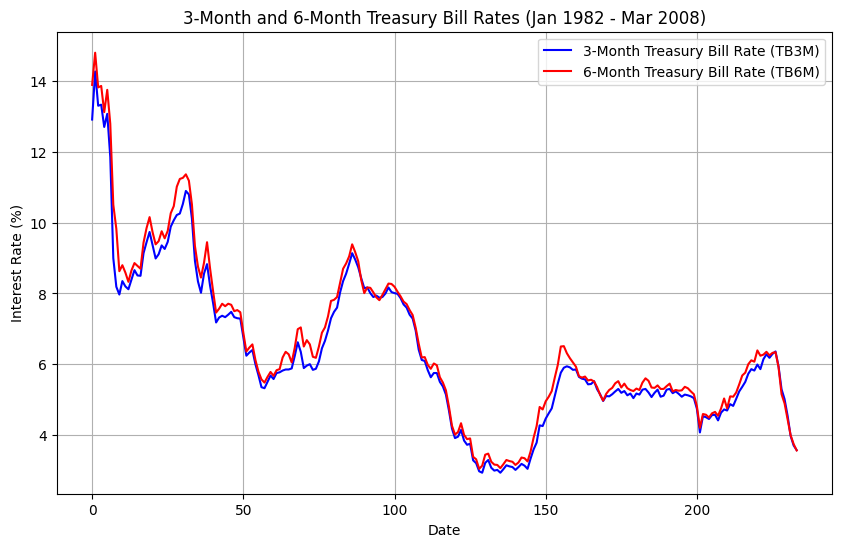

**Observation**: The two series appear to move closely together over time, suggesting a possible long-term relationship. Both exhibit trends and fluctuations, which may indicate non-stationarity.


ADF Test for TB3M:
ADF Statistic: -1.5391858164849086
p-value: 0.514045363282407
Critical Values: {'1%': -3.460018927623594, '5%': -2.8745897386146817, '10%': -2.57372514086348}
TB3M is non-stationary (fail to reject null hypothesis of unit root).

ADF Test for TB6M:
ADF Statistic: -3.7738194363438047
p-value: 0.003186826077188909
Critical Values: {'1%': -3.458854867412691, '5%': -2.8740800599399323, '10%': -2.573453223097503}
TB6M is stationary (reject null hypothesis of unit root).

ADF Test for TB3M First Difference:
ADF Statistic: -5.573440308131572
p-value: 1.449964833915459e-06
Critical Values: {'1%': -3.460018927623594, '5%': -2.8745897386146817, '10%': -2.57372514086348}
TB3M First Difference is stationary (reject null hypothesis of unit root).

ADF Test for TB6M First Difference:
ADF Statistic: -7.98179332631351
p-value: 2.6115016215903995e-12
Critical Values: {'1%': -3.4589796764641, '5%': -2.8741347158661448, '10%': -2.573482381701992}
TB6M First Difference is stationary (r

**Result**: The series are cointegrated (p-value < 0.05). This means there is a stable long-run relationship between TB3M and TB6M.


**Economic Meaning**:
- **If cointegrated**: TB3M and TB6M share a long-run equilibrium relationship, likely due to their connection to the term structure of interest rates. The spread between short-term rates (e.g., 3-month vs. 6-month) is stable over time, reflecting market expectations and liquidity preferences.
- **If not cointegrated**: The lack of cointegration implies that the two rates drift apart over time without a stable relationship. This could suggest structural breaks, policy shifts, or differing market dynamics affecting the rates independently.



**VAR Model with 4 Lags**:
- If the series are **non-stationary but cointegrated**, you can estimate the VAR in levels (or use a VECM). The cointegration implies a long-run relationship that justifies using levels.
- If the series are **non-stationary and not cointegrated**, you must use first differences to ensure stationarity for a valid VAR model.
- If the series are **stationary**, you can use levels directly.

Based on the ADF and cointegration results:


Since the series are cointegrated, we can use levels for VAR.

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Fri, 14, Mar, 2025
Time:                     18:48:13
--------------------------------------------------------------------
No. of Equations:         2.00000    BIC:                   -6.60086
Nobs:                     230.000    HQIC:                  -6.76139
Log likelihood:           155.330    FPE:                 0.00103864
AIC:                     -6.86993    Det(Omega_mle):     0.000961886
--------------------------------------------------------------------
Results for equation TB3M
             coefficient       std. error           t-stat            prob
--------------------------------------------------------------------------
const           0.174023         0.060143            2.893           0.004
L1.TB3M         1.774630         0.175928           10.087           0.000
L1.TB6M        -0.333347         0.170497           -1.955           0.051
L2.TB3M   

In [13]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller, coint
from statsmodels.tsa.vector_ar.var_model import VAR
import numpy as np
from IPython.display import display, Markdown

# Try to import Google Colab's file upload module; if it fails, assume we're in a different environment
try:
    from google.colab import files
    print("Running in Google Colab. Please upload the Excel file containing the TB3M and TB6M data.")
    uploaded = files.upload()
    filename = list(uploaded.keys())[0]  # Get the uploaded file name
except ModuleNotFoundError:
    # For Jupyter or other environments, prompt manual upload
    print("Not running in Google Colab. Please ensure the Excel file is in your working directory.")
    print("Enter the name of the Excel file (e.g., 'Table 22.1.xlsx'). Make sure to include the extension.")
    filename = input("Enter the name of the Excel file: ")

# Read the Excel file, forcing the 'Date' column to be read as a string (object) to prevent timedelta conversion
data = pd.read_excel(filename, dtype={'Date': str})

# a. Plot the two time series in the same diagram
plt.figure(figsize=(10, 6))
plt.plot(data.index, data['TB3M'], label='3-Month Treasury Bill Rate (TB3M)', color='blue')
plt.plot(data.index, data['TB6M'], label='6-Month Treasury Bill Rate (TB6M)', color='red')
plt.title('3-Month and 6-Month Treasury Bill Rates (Jan 1982 - Mar 2008)')
plt.xlabel('Date')
plt.ylabel('Interest Rate (%)')
plt.legend()
plt.grid()
plt.show()
display(Markdown("**Observation**: The two series appear to move closely together over time, suggesting a possible long-term relationship. Both exhibit trends and fluctuations, which may indicate non-stationarity."))

# b. Formal unit root analysis (Augmented Dickey-Fuller test)
def adf_test(series, name):
    result = adfuller(series.dropna())
    print(f'\nADF Test for {name}:')
    print(f'ADF Statistic: {result[0]}')
    print(f'p-value: {result[1]}')
    print(f'Critical Values: {result[4]}')
    if result[1] < 0.05:
        print(f'{name} is stationary (reject null hypothesis of unit root).')
    else:
        print(f'{name} is non-stationary (fail to reject null hypothesis of unit root).')

adf_test(data['TB3M'], 'TB3M')
adf_test(data['TB6M'], 'TB6M')

# First differences for stationarity check
data['TB3M_diff'] = data['TB3M'].diff().dropna()
data['TB6M_diff'] = data['TB6M'].diff().dropna()
adf_test(data['TB3M_diff'], 'TB3M First Difference')
adf_test(data['TB6M_diff'], 'TB6M First Difference')

# c. Cointegration test
coint_test = coint(data['TB3M'].dropna(), data['TB6M'].dropna())
print('\nCointegration Test (Engle-Granger):')
print(f'Test Statistic: {coint_test[0]}')
print(f'p-value: {coint_test[1]}')
print(f'Critical Values: {coint_test[2]}')
if coint_test[1] < 0.05:
    display(Markdown("**Result**: The series are cointegrated (p-value < 0.05). This means there is a stable long-run relationship between TB3M and TB6M."))
else:
    display(Markdown("**Result**: The series are not cointegrated (p-value >= 0.05). No stable long-run relationship exists."))

# d. Economic meaning of cointegration
display(Markdown("""
**Economic Meaning**:
- **If cointegrated**: TB3M and TB6M share a long-run equilibrium relationship, likely due to their connection to the term structure of interest rates. The spread between short-term rates (e.g., 3-month vs. 6-month) is stable over time, reflecting market expectations and liquidity preferences.
- **If not cointegrated**: The lack of cointegration implies that the two rates drift apart over time without a stable relationship. This could suggest structural breaks, policy shifts, or differing market dynamics affecting the rates independently.
"""))

# e. VAR model estimation
display(Markdown("""
**VAR Model with 4 Lags**:
- If the series are **non-stationary but cointegrated**, you can estimate the VAR in levels (or use a VECM). The cointegration implies a long-run relationship that justifies using levels.
- If the series are **non-stationary and not cointegrated**, you must use first differences to ensure stationarity for a valid VAR model.
- If the series are **stationary**, you can use levels directly.

Based on the ADF and cointegration results:
"""))

if coint_test[1] < 0.05:
    display(Markdown("Since the series are cointegrated, we can use levels for VAR."))
    model = VAR(data[['TB3M', 'TB6M']].dropna())
    results = model.fit(4)
    print(results.summary())
else:
    display(Markdown("Since the series are not cointegrated and non-stationary, we use first differences for VAR."))
    model = VAR(data[['TB3M_diff', 'TB6M_diff']].dropna())
    results = model.fit(4)
    print(results.summary())